# 1. Read and Analyse Dataset

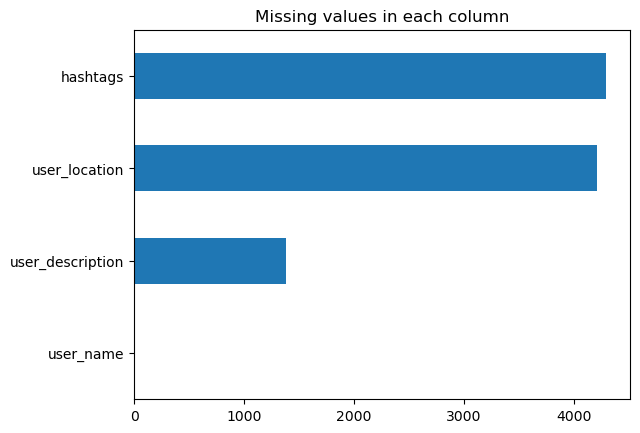

In [1]:
#I Missing Value Analysis and Imputation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('TheSocialDilemma.csv')

# Function to plot missing values
def plot_missing_values(dataframe):
    missing_values = dataframe.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values.sort_values(inplace=True)
    missing_values.plot(kind='barh')
    plt.title('Missing values in each column')
    plt.show()

plot_missing_values(df)


In [5]:
#II. Eliminate Non-English Textual Data

from langdetect import detect
import langdetect

# Function to detect language
def detect_lang(text):
    try:
        return detect(text)
    except langdetect.lang_detect_exception.LangDetectException:
        return None

# Apply language detection
df['lang'] = df['text'].apply(detect_lang)

# Keep only English tweets
df = df[df['lang'] == 'en']

# Drop the 'lang' column as it's no longer needed
df.drop('lang', axis=1, inplace=True)


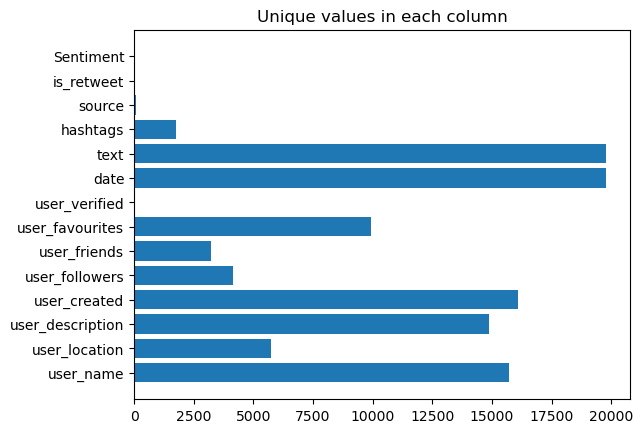

In [6]:
#B. Write a custom function to plot the count of unique functions in every column.

def plot_unique_values(dataframe):
    unique_counts = {col: dataframe[col].nunique() for col in dataframe.columns}
    plt.barh(range(len(unique_counts)), list(unique_counts.values()), tick_label=list(unique_counts.keys()))
    plt.title('Unique values in each column')
    plt.show()

plot_unique_values(df)


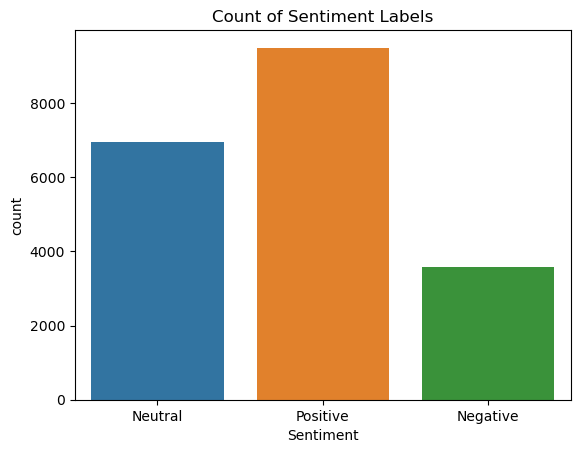

In [8]:
#C. plot for Social Dilemma Sentiment Labels

sns.countplot(x='Sentiment', data=df)
plt.title('Count of Sentiment Labels')
plt.show()

C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127474 (\N{REGIONAL INDICATOR SYMBOL LETTER M}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129318 (\N{FACE PALM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2384 (\N{DEVANAGARI OM}) missing 

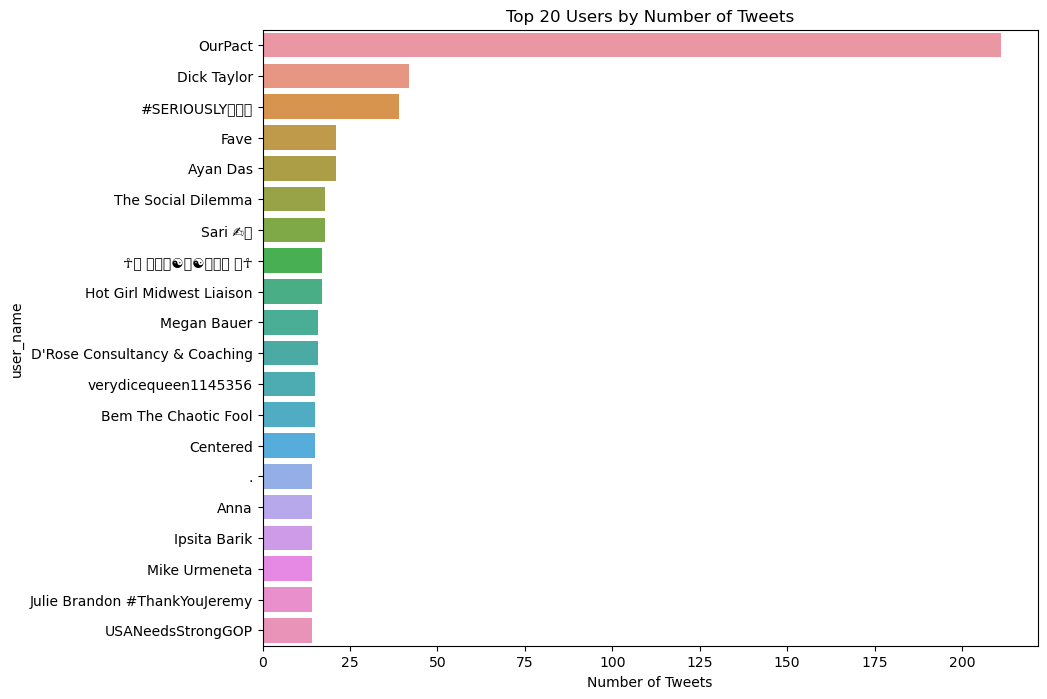

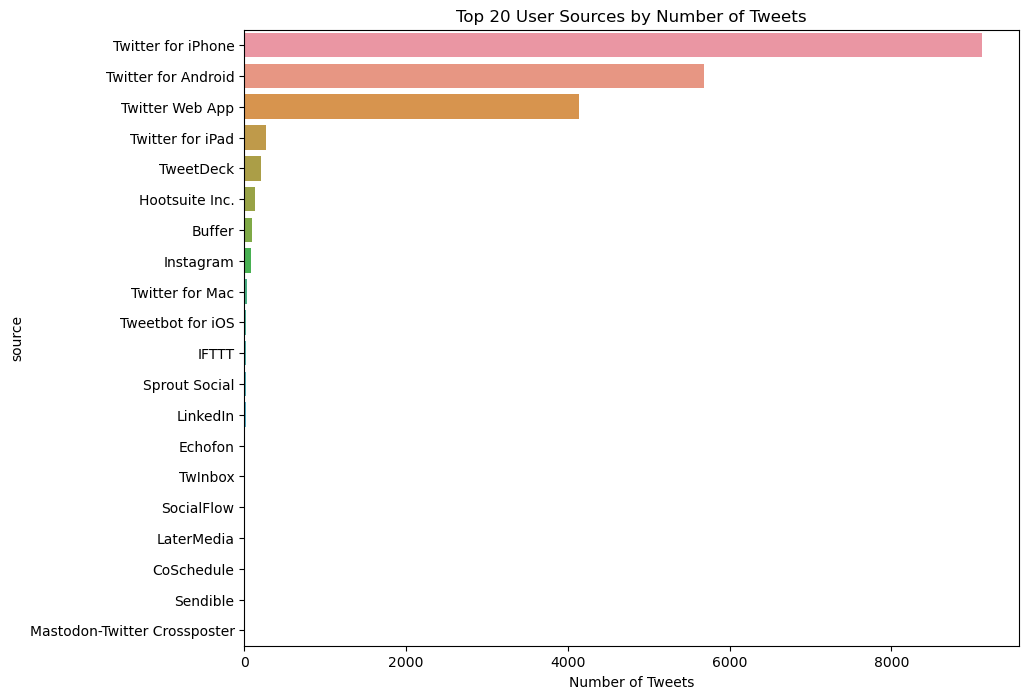

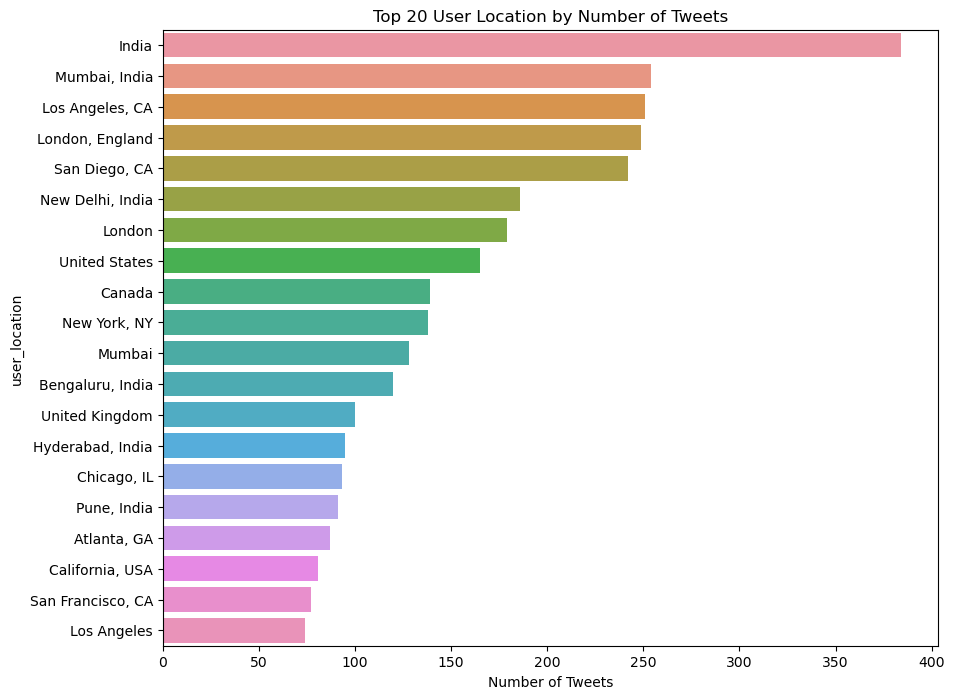

In [11]:
#D. Plot and identify the top 20 users, user sources, user locations by number of tweets

# Top 20 users
top_users = df['user_name'].value_counts().head(20)
plt.figure(figsize=(10,8))
sns.barplot(x=top_users.values, y=top_users.index)
plt.title('Top 20 Users by Number of Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('user_name')
plt.show()

# Top 20 user sources
top_users = df['source'].value_counts().head(20)
plt.figure(figsize=(10,8))
sns.barplot(x=top_users.values, y=top_users.index)
plt.title('Top 20 User Sources by Number of Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('source')
plt.show()

# Top 20 user locations
top_users = df['user_location'].value_counts().head(20)
plt.figure(figsize=(10,8))
sns.barplot(x=top_users.values, y=top_users.index)
plt.title('Top 20 User Location by Number of Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('user_location')
plt.show()


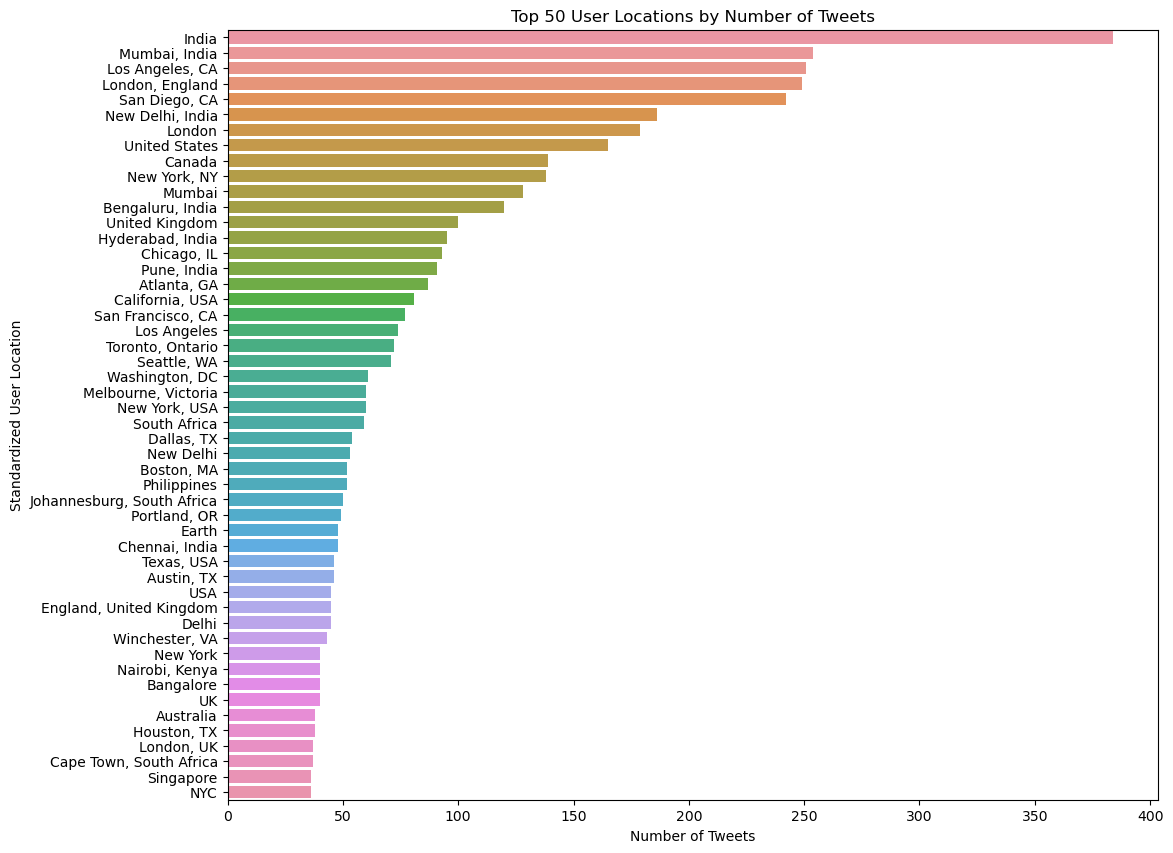

In [70]:
#E. Format Top 50 User Locations into City, Country

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def standardize_location(location):
    location = location.strip()
    if ',' in location:
        return location
    else:
       
        return location

# Apply the standardize_location function to the top 50 user_locations
top_user_locations = df['user_location'].value_counts().head(50).index.tolist()
standardized_user_locations = {loc: standardize_location(loc) for loc in top_user_locations}

# Update the DataFrame with standardized user_locations for the top 50 user_locations
df['standardized_user_location'] = df['user_location'].apply(lambda x: standardized_user_locations.get(x, x))

top_50_standardized_user_locations = df['standardized_user_location'].value_counts().head(50)

plt.figure(figsize=(12, 10))
sns.barplot(y=top_50_standardized_user_locations.index, x=top_50_standardized_user_locations.values)
plt.title('Top 50 User Locations by Number of Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('Standardized User Location')
plt.show()


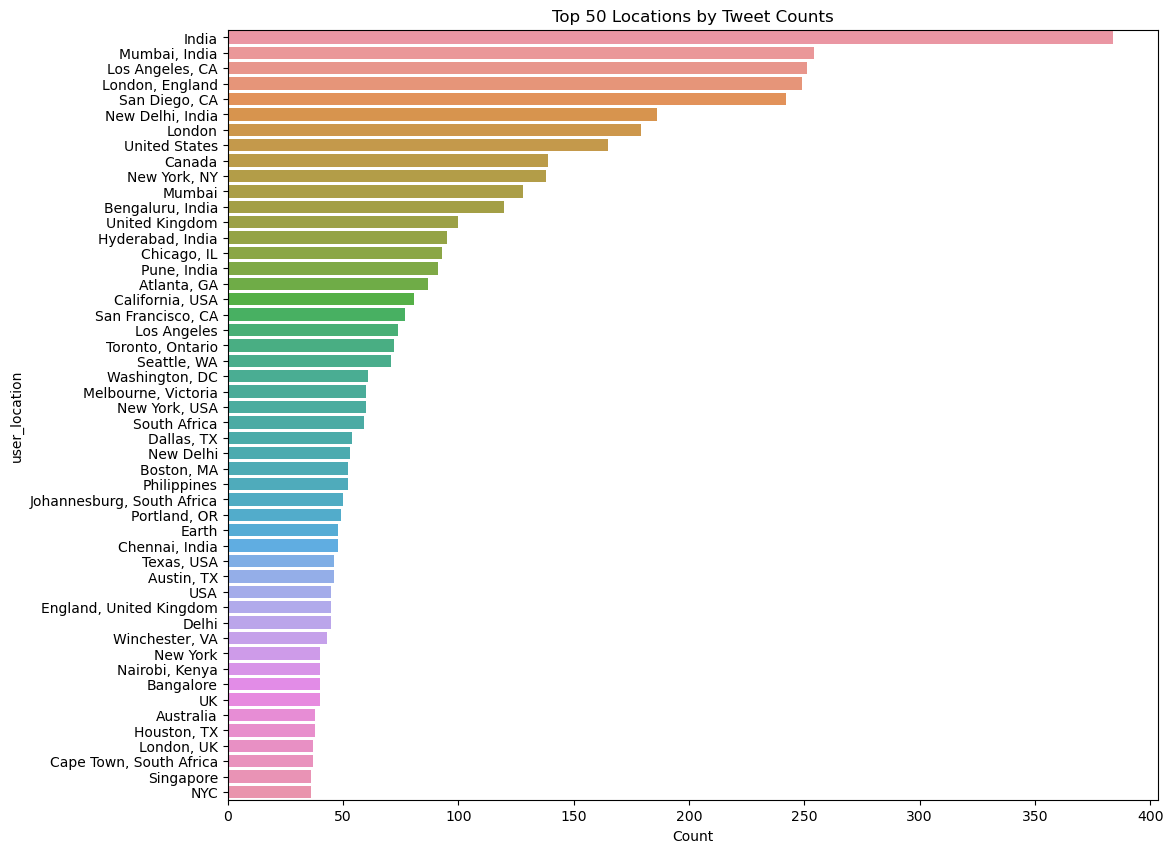

In [15]:
#F. Plot the count of tweets from every place identified above

plt.figure(figsize=(12, 10))
sns.countplot(y='user_location', data=df, order=df['user_location'].value_counts().index[:50])
plt.title('Top 50 Locations by Tweet Counts')
plt.xlabel('Count')
plt.ylabel('user_location')
plt.show()


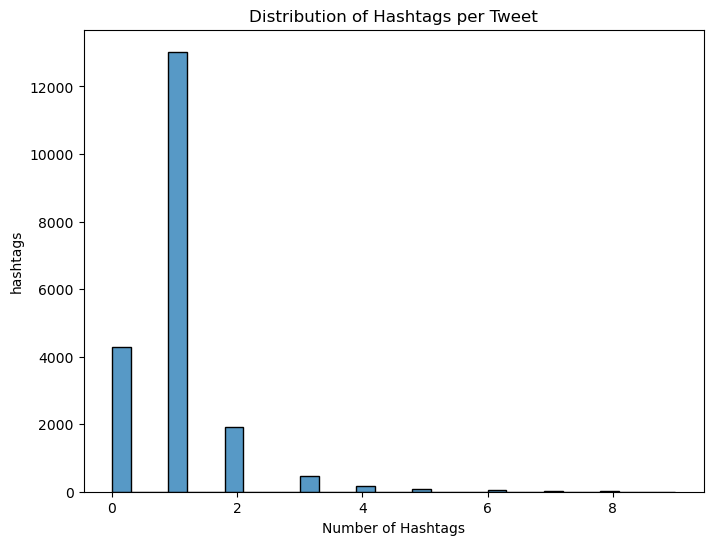

In [16]:
#G. Number of Hashtags per Tweet

df['hashtags'] = df['text'].apply(lambda x: x.count('#'))

plt.figure(figsize=(8, 6))
sns.histplot(df['hashtags'], bins=30, kde=False)
plt.title('Distribution of Hashtags per Tweet')
plt.xlabel('Number of Hashtags')
plt.ylabel('hashtags')
plt.show()


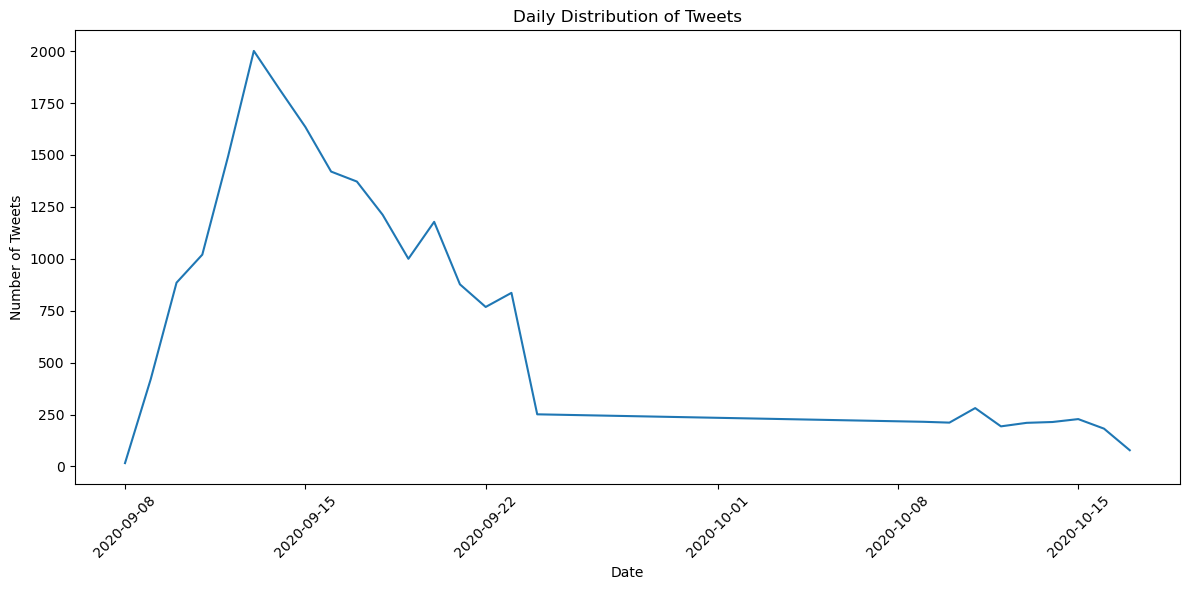

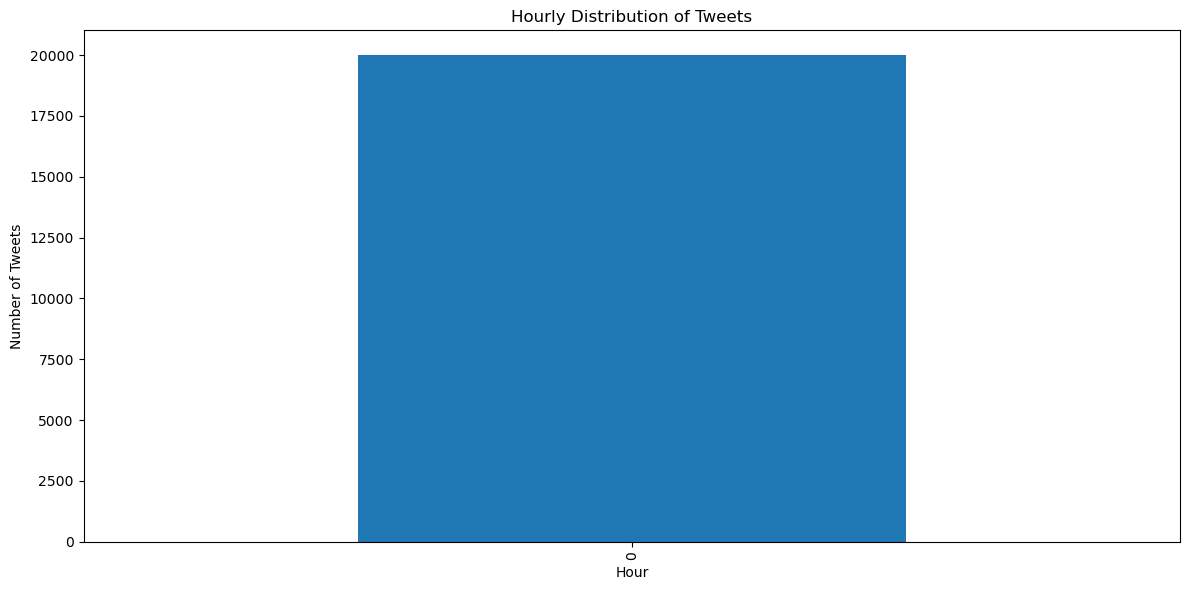

In [18]:
#H. Daily and Hourly Distribution of Tweets

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract date and hour for further analysis
df['only_date'] = df['date'].dt.date
df['hour'] = df['date'].dt.hour

# Daily distribution
plt.figure(figsize=(12, 6))
df.groupby('only_date').size().plot(kind='line')
plt.title('Daily Distribution of Tweets')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit date labels
plt.show()

# Hourly distribution
plt.figure(figsize=(12, 6))
df.groupby('hour').size().plot(kind='bar')
plt.title('Hourly Distribution of Tweets')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.tight_layout()  # Adjust layout to fit hour labels
plt.show()



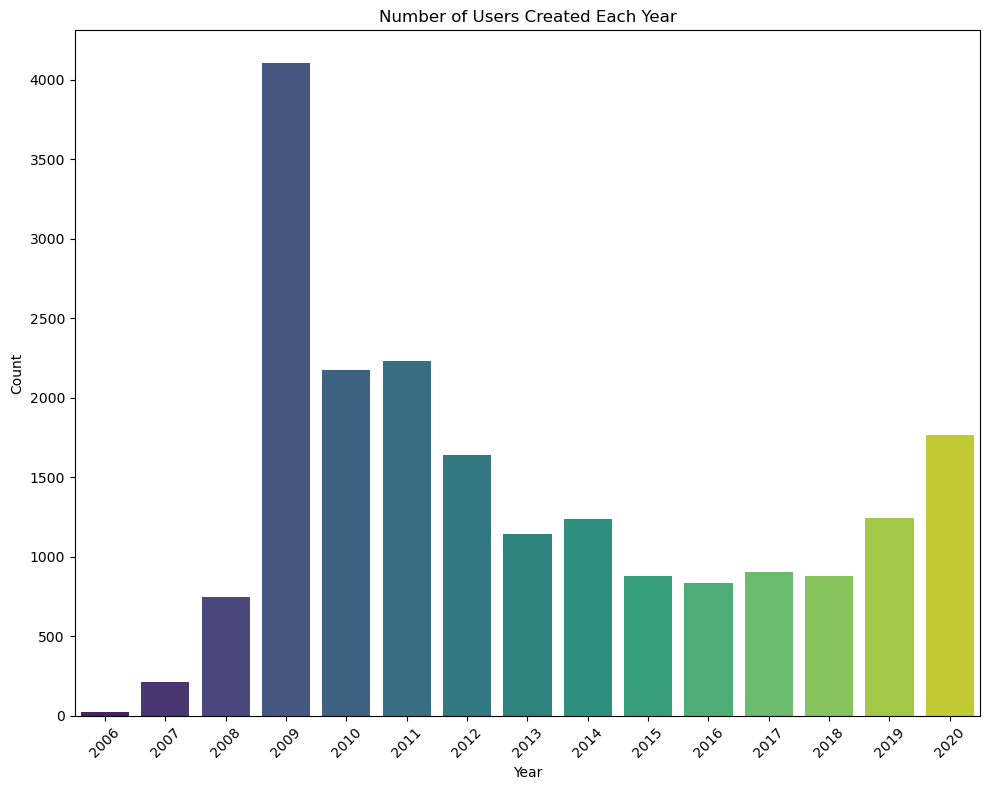

In [20]:
#I. Number of Users Created Each Year

# Convert 'user_created' column to datetime
df['user_created'] = pd.to_datetime(df['user_created'])

# Extract the year from 'user_created' column
df['user_created_year'] = df['user_created'].dt.year

# Plot the number of users created each year
plt.figure(figsize=(10, 8))
sns.countplot(x='user_created_year', data=df, palette='viridis', order = sorted(df['user_created_year'].unique()))
plt.title('Number of Users Created Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


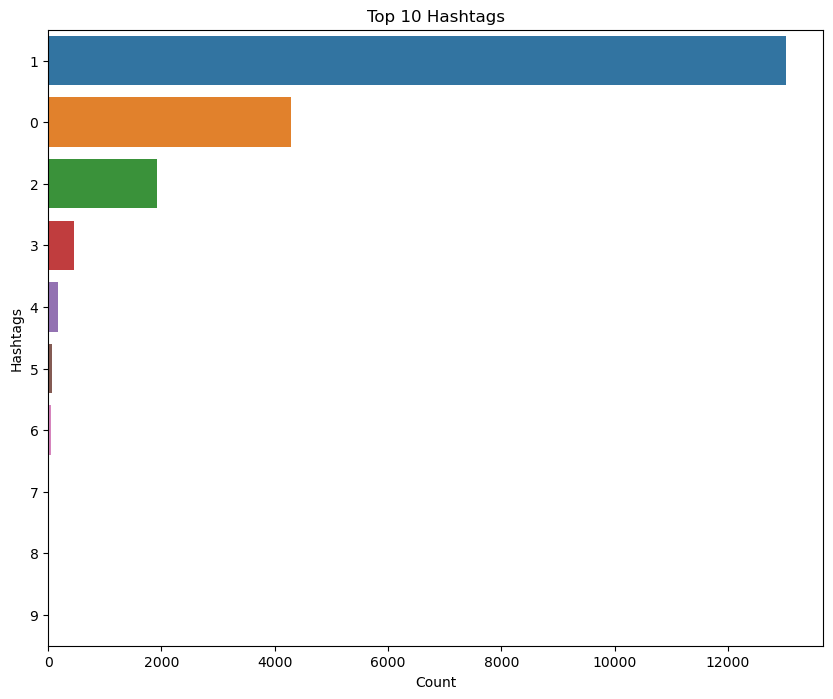

In [72]:
#J. Top 10 Hashtags Used in the Tweets

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Convert the 'hashtags' column to strings
df['hashtags'] = df['hashtags'].astype(str)

# Create a new column 'hashtags_list' that contains a list of hashtags
df['hashtags_list'] = df['hashtags'].apply(lambda x: x.split())

# Flatten the list of hashtags and count the occurrences
hashtags_counter = Counter(hashtag for hashtags_list in df['hashtags_list'] for hashtag in hashtags_list)
top_hashtags = hashtags_counter.most_common(10)

# Separate the hashtags and their counts for plotting
hashtags, counts = zip(*top_hashtags)

# Plot the top hashtags
plt.figure(figsize=(10, 8))
sns.barplot(x=list(counts), y=list(hashtags))
plt.title('Top 10 Hashtags')
plt.xlabel('Count')
plt.ylabel('Hashtags')
plt.show()



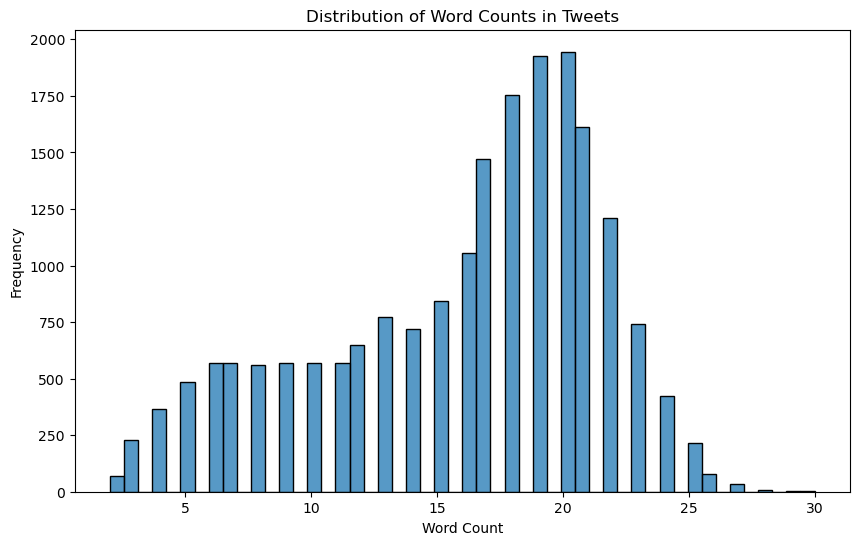

In [25]:
#K. Number of Words in Each Text and Plot the Distribution

df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=False)
plt.title('Distribution of Word Counts in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


[nltk_data] Downloading package stopwords to C:\Users\Rigved
[nltk_data]     Hebbalkar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Rigved
[nltk_data]     Hebbalkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


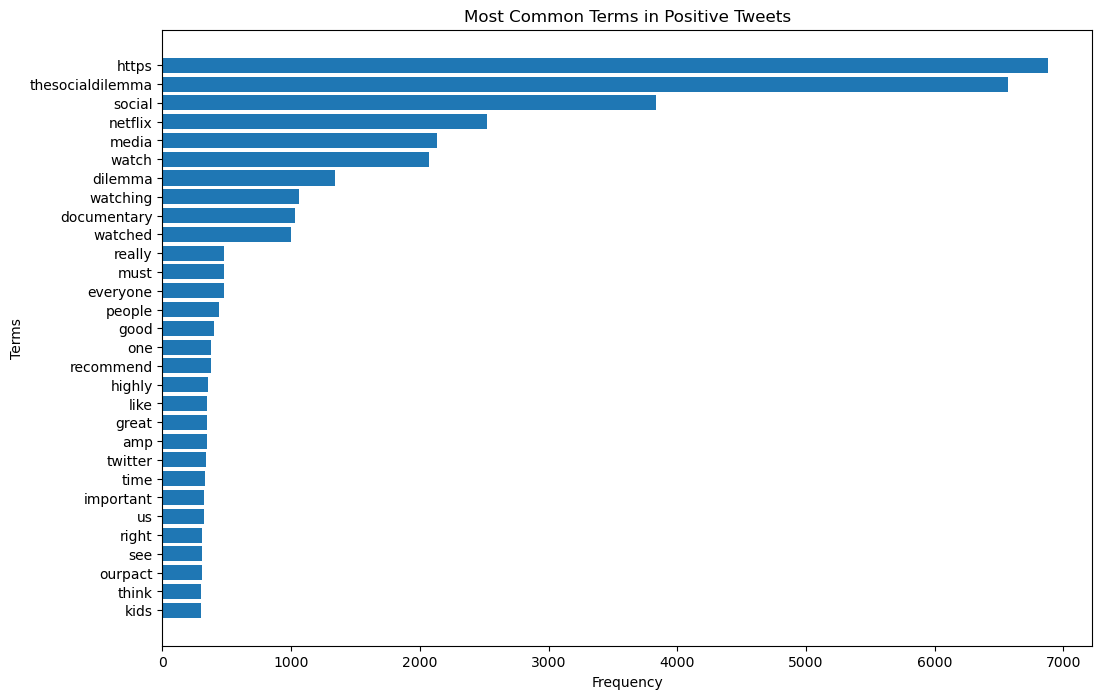

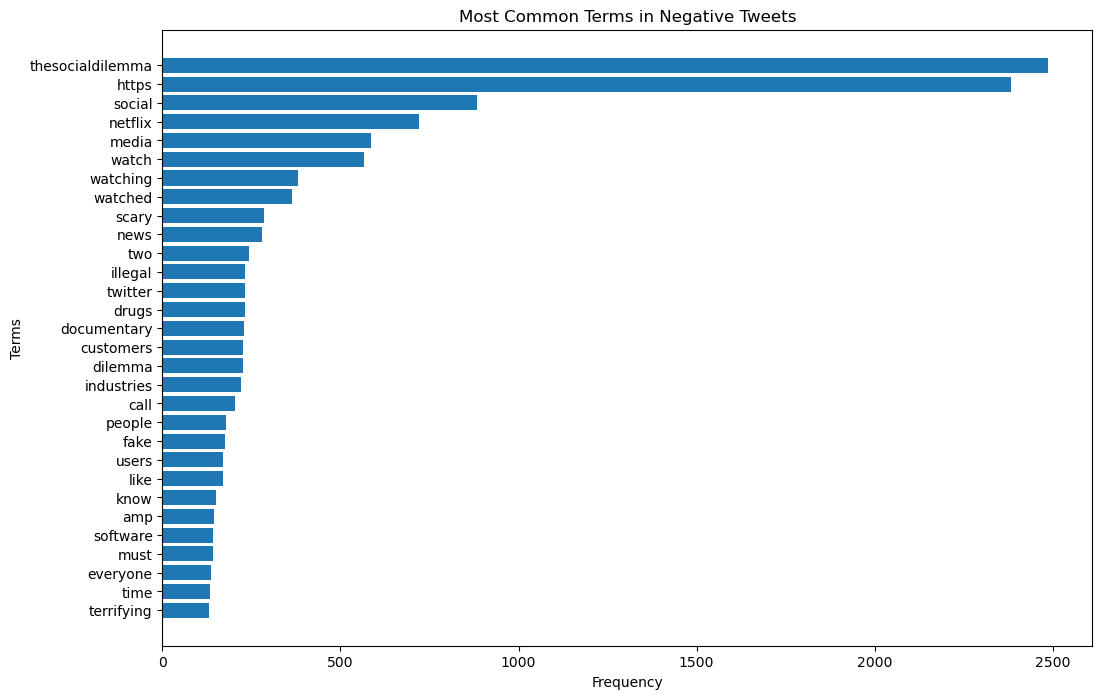

In [36]:
#L. Word Cloud for Negative and Positive Tweets

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter

# Download necessary NLTK datasets
nltk.download('stopwords')
nltk.download('punkt')

# Define stop words
stop_words = set(stopwords.words('english'))

# Function to create a counter of terms for a given series of text data
def get_most_common_terms(text_series, num_terms=30):
    # Tokenize and lower case the string
    all_terms = nltk.tokenize.word_tokenize(' '.join(text_series).lower())
    # Remove stopwords and non-alphabetic tokens
    terms = [term for term in all_terms if term.isalpha() and term not in stop_words]
    # Create a counter of terms and return the most common ones
    return Counter(terms).most_common(num_terms)

# Normalize sentiment values and extract tweets for each sentiment
df['Sentiment'] = df['Sentiment'].str.lower()  # lower case the sentiment values
positive_tweets = df[df['Sentiment'] == 'positive']['text']
negative_tweets = df[df['Sentiment'] == 'negative']['text']

# Check if there are any positive or negative tweets to avoid ValueError
if positive_tweets.empty:
    print("No positive tweets to display.")
else:
    positive_common_terms = get_most_common_terms(positive_tweets)
    # Define a function for plotting
    def plot_common_terms(common_terms, title):
        if common_terms:  # Check if there are any terms to plot
            terms, frequencies = zip(*common_terms)
            # Create the plot
            plt.figure(figsize=(12, 8))
            plt.barh(terms, frequencies)
            plt.gca().invert_yaxis()  # Display the highest frequency at the top
            plt.title(title)
            plt.xlabel('Frequency')
            plt.ylabel('Terms')
            plt.show()
        else:
            print(f"No terms to plot for {title}")

    # Plot the common terms for positive sentiment
    plot_common_terms(positive_common_terms, 'Most Common Terms in Positive Tweets')

# Repeat the check and plot for negative tweets
if negative_tweets.empty:
    print("No negative tweets to display.")
else:
    negative_common_terms = get_most_common_terms(negative_tweets)
    # Plot the common terms for negative sentiment
    plot_common_terms(negative_common_terms, 'Most Common Terms in Negative Tweets')



# 2. Data preparation

In [37]:
#2.A. Eliminate All Special Characters and Numbers

df['clean_text'] = df['text'].str.replace("[^a-zA-Z#]", " ")


C:\Users\Rigved Hebbalkar\AppData\Local\Temp\ipykernel_15336\3098071539.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['text'].str.replace("[^a-zA-Z#]", " ")


In [38]:
#2.B. Remove HTML Tags

import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return re.sub(pattern, '', text)

df['clean_text'] = df['clean_text'].apply(lambda x: remove_html_tags(x))


In [41]:
#2.C. Replace Contractions

import contractions
def replace_contractions(text):
    return contractions.fix(text)

df['clean_text'] = df['clean_text'].apply(lambda x: replace_contractions(x))


In [44]:
#2.D Remove URLs


def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

df['clean_text'] = df['clean_text'].apply(lambda x: remove_urls(x))


In [45]:
#2.E. Remove Mentions

df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'@\w+', '', x))


In [46]:
#2. F. Remove Stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [47]:
#2. G. Lowercase All Textual Data

df['clean_text'] = df['clean_text'].str.lower()


In [54]:
#2. H. Perform Tokenization and Lemmatization

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized)

df['clean_text'] = df['clean_text'].apply(lambda x: lemmatize_text(x))


In [55]:
#2.I. Remove Hashtags

df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'#\w+', '', x))


# 3. Build a base Classification model

In [56]:
#3.A. Create Dependent and Independent Variables

X = df['clean_text']
y = df['Sentiment']

In [57]:
#3.B. Split Data into Train and Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
#3.C. Vectorize Data

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)


In [59]:
#3.D. Build a Base Model for Supervised Learning - Classification

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train_vectors, y_train)
y_pred = model.predict(X_test_vectors)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8367754830113258


C:\Users\Rigved Hebbalkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
#3.E. Print Performance Metrics

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.84      0.57      0.68      1063
     neutral       0.80      0.91      0.85      2072
    positive       0.86      0.88      0.87      2869

    accuracy                           0.84      6004
   macro avg       0.84      0.79      0.80      6004
weighted avg       0.84      0.84      0.83      6004



In [62]:
#3.F. Model Improvement

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_vectors, y_train)
y_pred_rf = model_rf.predict(X_test_vectors)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

    negative       0.86      0.50      0.63      1063
     neutral       0.77      0.93      0.84      2072
    positive       0.86      0.86      0.86      2869

    accuracy                           0.82      6004
   macro avg       0.83      0.76      0.78      6004
weighted avg       0.83      0.82      0.81      6004



In [73]:
#3.G. Try Different Models

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Multinomial Naive Bayes": MultinomialNB()
}



# Dictionary to hold model accuracy for comparison
accuracy_results = {}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_vectors, y_train)  # Train model
    y_pred = model.predict(X_test_vectors)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_results[model_name] = accuracy  # Store accuracy for comparison
    print(f"{model_name} Classification Report:\n{classification_report(y_test, y_pred)}\n")

# Print accuracy comparison
print("Accuracy Comparison:")
for model_name, accuracy in accuracy_results.items():
    print(f"{model_name}: {accuracy:.4f}")

# Specifically compare with Random Forest
print("\nComparison with Random Forest:")
rf_accuracy = accuracy_results["Random Forest"]
for model_name, accuracy in accuracy_results.items():
    if model_name != "Random Forest":
        difference = accuracy - rf_accuracy
        print(f"{model_name} vs. Random Forest Difference: {difference:+.4f}")



Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.86      0.50      0.63      1063
     neutral       0.77      0.93      0.84      2072
    positive       0.86      0.86      0.86      2869

    accuracy                           0.82      6004
   macro avg       0.83      0.76      0.78      6004
weighted avg       0.83      0.82      0.81      6004


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.57      0.68      1063
     neutral       0.80      0.91      0.85      2072
    positive       0.86      0.88      0.87      2869

    accuracy                           0.84      6004
   macro avg       0.84      0.79      0.80      6004
weighted avg       0.84      0.84      0.83      6004


SVM Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.57      0.68      1063
     neutral       0

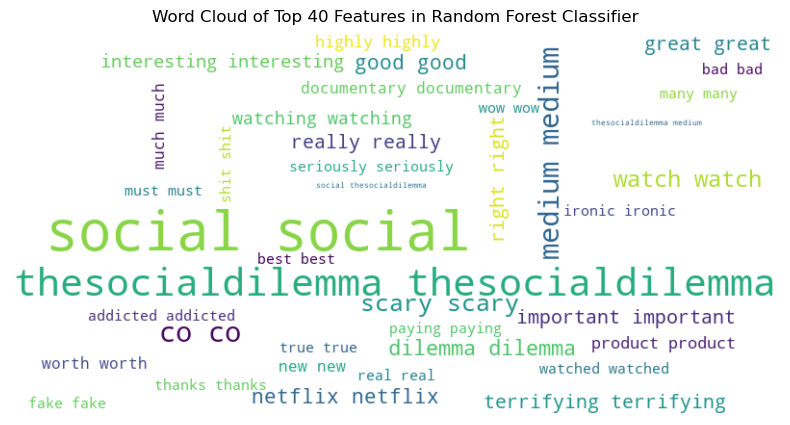

In [74]:
#3. H. Wordcloud of top 40 important features from the final model chosen

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get feature importances from the model and feature names from the vectorizer
feature_importances = model_rf.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Sort features by importance
sorted_indices = feature_importances.argsort()[::-1][:40]  # Get indices of top 40 features

# Create a dictionary with feature names as keys and importances as values
top_features = {feature_names[i]: feature_importances[i] for i in sorted_indices}

# Generate a string with each feature name repeated according to its importance

scaled_importances = [int(importance * 10000) for importance in top_features.values()]
feature_string = " ".join([f"{word} " * count for word, count in zip(top_features.keys(), scaled_importances)])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(feature_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 40 Features in Random Forest Classifier')
plt.show()
